# Fetch les données brutes
## Une fois téléchargées, elles seront dans /projet_glacier/data/raw/...

In [1]:
from glacier.data import fetch_data, unzip_to
paths = fetch_data("20260114")

### Dézippe les fichiers téléchargers


In [2]:
paths = fetch_data("20260114")
extracted_root = paths[0].parent / "extracted"
extracted_dirs = unzip_to(paths, extracted_root)

# Petit apperçu du jeu de données brut

In [3]:
from pathlib import Path
from glacier.data.data_fetching import repo_root
import geopandas as gpd
import pandas as pd

In [4]:
root = repo_root()
base = root / "data" / "raw" / "glims_v1" / "extracted"

north = next(p for p in base.rglob("glims_polygons.shp") if "_north_" in str(p).lower())
south = next(p for p in base.rglob("glims_polygons.shp") if "_south_" in str(p).lower())

gdf_raw_north = gpd.read_file(north)
gdf_raw_south = gpd.read_file(south)

len(gdf_raw_north), len(gdf_raw_south), gdf_raw_north.crs

C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\.venv\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\data\raw\glims_v1\extracted\NSIDC-0272_glims_db_north_20260114_v01.0\glims_download_73053\glims_polygons.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(
C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\.venv\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\data\raw\glims_v1\extracted\NSIDC-0272_glims_db_south_20260114_v01.0\glims_download_05601\glims_polygons.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


(616791,
 169129,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [5]:
gdf_raw_north.columns
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
gdf_raw_north.head(3)

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,rec_status,glac_name,wgms_id,local_id,glac_stat,gone_date,gone_dt_e,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,conn_lvl,surge_type,term_type,gtng_o1reg,gtng_o2reg,rgi_gl_typ,parent_id,submitters,analysts,geometry
0,glac_bound,715234.0,G340953E63564N,1993-09-01T00:00:00,12.414,12.413600,0.0,0.0,0.0,405.0,0.0,1440.0,1999-09-09T00:00:00,okay,None,None,None,exists,None,0.0,719.0,2014-12-01T11:00:00,Manual glacier digitization from ASTER imagery...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,6.0,1.0,None,G340925E63656N,"Sigurdsson, Oddur","Sigurdsson, Oddur","POLYGON ((-19.04472 63.58378, -19.04474 63.583..."
1,glac_bound,1048878.0,G306386E70153N,2020-09-09T00:00:00,0.000,14.933000,0.0,0.0,0.0,0.0,0.0,0.0,1900-09-09T00:00:00,okay,None,None,None,exists,None,0.0,830.0,2020-08-25T09:00:00,Mapping of Little Ice Age morraines; Mapped mo...,586.0,Greenland,University of Leeds,0.0,0.0,0.0,5.0,1.0,None,None,"Carrivick, Jonathan L.","Carrivick, Jonathan L.","POLYGON ((-53.67435 70.18178, -53.66553 70.180..."
2,glac_bound,409177.0,G222822E58665N,2015-07-16T00:00:00,0.777,0.776922,0.0,0.0,0.0,2496.0,0.0,3879.0,2010-09-15T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,1.0,9.0,1.0,6.0,19,G222793E58546N,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-137.17153 58.66963, -137.17016 58.6..."


<Axes: >

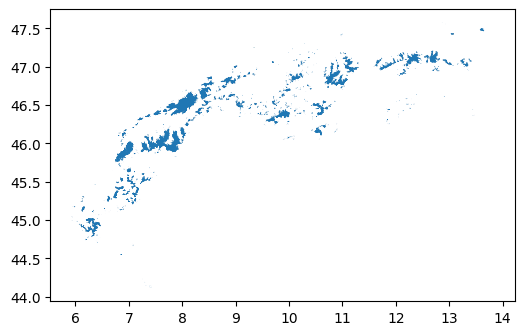

In [6]:
gdf_raw_north.cx[5:15, 44:48.5].plot(figsize=(6, 6)) ## on a fait un zoom ici sur les alpes si on zoomait nul part on voyait rien sur le graphe

# Nettoyage du jeu de données
## Une fois téléchargées, elles seront dans /projet_glacier/data/processed/...
Pour voir précisément comment les nettoyage est fait, il est possible de consulter le fichier
src/glacier/data/data_cleaning.py.
Pour faire court, le nettoyage du jeu de données consiste à :
- Conserver uniquement les véritables outlines de glaciers (line_type = "glac_bound").
- Supprimer les géométries vides ou nulles, qui ne peuvent pas être utilisées pour l’analyse spatiale.
- Convertir les dates d’analyse et retirer les observations sans date valide.
- S’assurer que le système de coordonnées (CRS) est correctement défini.
- Corriger les géométries invalides (auto-intersections, polygones mal formés).
- Décomposer les MultiPolygons afin d’avoir une géométrie par ligne. (Le nombre d’observations après nettoyage ne correspond plus strictement au nombre de glaciers, mais au nombre de polygones représentant des portions de glaciers.)
- Éliminer les observations aberrantes (aire nulle ou négative)
- Supprimer les doublons exacts
- Normaliser certains champs

In [7]:
from glacier.data import fetch_data, clean_glims_outlines

In [8]:
gdf_north_clean = clean_glims_outlines(gdf_raw_north)
gdf_south_clean = clean_glims_outlines(gdf_raw_south)

gdf_clean = gpd.GeoDataFrame(
    pd.concat([gdf_north_clean, gdf_south_clean], ignore_index=True),
    crs=gdf_north_clean.crs
)

In [9]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

gdf_clean.head()

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,rec_status,glac_name,wgms_id,local_id,glac_stat,gone_date,gone_dt_e,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,conn_lvl,surge_type,term_type,gtng_o1reg,gtng_o2reg,rgi_gl_typ,parent_id,submitters,analysts,geometry
0,glac_bound,715234.0,G340953E63564N,1993-09-01 00:00:00+00:00,12.414,12.413600,0.0,0.0,0.0,405.0,0.0,1440.0,1999-09-09T00:00:00,okay,None,None,None,exists,None,0.0,719.0,2014-12-01T11:00:00,Manual glacier digitization from ASTER imagery...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,6.0,1.0,None,G340925E63656N,"Sigurdsson, Oddur","Sigurdsson, Oddur","POLYGON ((-19.04472 63.58378, -19.04474 63.583..."
1,glac_bound,409177.0,G222822E58665N,2015-07-16 00:00:00+00:00,0.777,0.776922,0.0,0.0,0.0,2496.0,0.0,3879.0,2010-09-15T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,1.0,9.0,1.0,6.0,19,G222793E58546N,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-137.17153 58.66963, -137.17016 58.6..."
2,glac_bound,405377.0,G217968E60885N,2015-07-16 00:00:00+00:00,8.838,8.837740,0.0,0.0,0.0,1560.0,0.0,2410.0,2010-09-12T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,5.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-141.99826 60.87683, -141.99836 60.8..."
3,glac_bound,401811.0,G214518E60704N,2015-07-16 00:00:00+00:00,0.258,0.258463,0.0,0.0,0.0,600.0,0.0,1147.0,2010-09-02T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,4.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-145.47844 60.70451, -145.47778 60.7..."
4,glac_bound,414761.0,G227911E56819N,2015-07-16 00:00:00+00:00,0.260,0.260388,0.0,0.0,0.0,1203.0,0.0,1399.0,2004-08-10T00:00:00,okay,None,None,None,exists,None,0.0,624.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,0.0,0.0,9.0,1.0,6.0,99,None,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-132.08464 56.82164, -132.0858 56.81..."


In [10]:
print("raw north:", len(gdf_raw_north), "-> clean:", len(gdf_north_clean)) 
print("raw south:", len(gdf_raw_south), "-> clean:", len(gdf_south_clean))
print("total clean:", len(gdf_clean))
gdf_clean.info()

raw north: 616791 -> clean: 323782
raw south: 169129 -> clean: 106515
total clean: 430297
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430297 entries, 0 to 430296
Data columns (total 36 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   line_type   430297 non-null  str                
 1   anlys_id    430297 non-null  float64            
 2   glac_id     430297 non-null  str                
 3   anlys_time  430297 non-null  datetime64[us, UTC]
 4   area        430297 non-null  float64            
 5   db_area     430297 non-null  float64            
 6   width       430297 non-null  float64            
 7   length      430297 non-null  float64            
 8   primeclass  430297 non-null  float64            
 9   min_elev    430297 non-null  float64            
 10  mean_elev   430297 non-null  float64            
 11  max_elev    430297 non-null  float64            
 12  src_date    430297 non-null  s

In [12]:
root = repo_root()
out = root / "data" / "processed" / "glims_clean.parquet"
out.parent.mkdir(parents=True, exist_ok=True)

gdf_clean.to_parquet(out)